In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import statsmodels.api as sm

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_merged = pd.read_csv("Company_Data.csv").drop("Unnamed: 0", axis = 1).set_index("Rank")

In [3]:
df_merged.head()

,Company,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Domain,Alexa Rank,Back Links,Page Authority,...,Domain Worth,Code Size,Text to Code Ratio,Semrush Rank,Organic Keywords,Organic Traffic,Opportunity Cost,Adwords Keywords,Adwords Traffic,Adwords Budget
Rank,,,,,,,,,,,,,,,,,,,,,
1,Walmart,523964.0,14881,236495.0,321803.3,2200000,walmart.com,126,0,0/,...,19.12M,NaN,'0.68%,15.0,29145287.0,190314352.0,124437628$,37053.0,3949947.0,2396610$
2,Amazon.com,280522.0,11588,225248.0,970680.1,798000,amazon.com,14,0,0/,...,172.07M,NaN,'0.68%,3.0,91384723.0,950416767.0,724598977$,79995.0,2943519.0,9398034$
3,Exxon Mobil,264938.0,14340,362597.0,160696.3,74900,exxonmobil.com,27230,0,0/,...,88.47K,NaN,'0.68%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apple,260174.0,55256,338516.0,1112640.8,137000,apple.com,51,0,0/,...,47.24M,NaN,'0.68%,20.0,17897033.0,159102793.0,220655359$,15095.0,3382490.0,3923068$
5,CVS Health,256776.0,6634,222449.0,77375.8,290000,cvshealth.com,31978,0,0/,...,75.33K,NaN,'0.68%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_final = df_merged[['Revenue($m)', 'Profits($m)', 'Assets($m)', 
                     'Market Value($m)', 'Employees','Alexa Rank', 
                     'Semrush Rank', 'Organic Keywords', 'Organic Traffic',
                     'Adwords Keywords', 'Adwords Traffic']]

In [5]:
df_final.head()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic
Rank,,,,,,,,,,,
1,523964.0,14881,236495.0,321803.3,2200000,126,15.0,29145287.0,190314352.0,37053.0,3949947.0
2,280522.0,11588,225248.0,970680.1,798000,14,3.0,91384723.0,950416767.0,79995.0,2943519.0
3,264938.0,14340,362597.0,160696.3,74900,27230,NaN,NaN,NaN,NaN,NaN
4,260174.0,55256,338516.0,1112640.8,137000,51,20.0,17897033.0,159102793.0,15095.0,3382490.0
5,256776.0,6634,222449.0,77375.8,290000,31978,NaN,NaN,NaN,NaN,NaN


In [6]:
df_final.isnull().sum(), df_final.shape

(Revenue($m)           0
 Profits($m)           0
 Assets($m)            0
 Market Value($m)      0
 Employees             0
 Alexa Rank            0
 Semrush Rank        626
 Organic Keywords    626
 Organic Traffic     626
 Adwords Keywords    626
 Adwords Traffic     626
 dtype: int64, (928, 11))

In [7]:
df_final = df_final.dropna()

In [8]:
df_final.shape

(302, 11)

In [9]:
df_final.head()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic
Rank,,,,,,,,,,,
1,523964.0,14881,236495.0,321803.3,2200000,126,15.0,29145287.0,190314352.0,37053.0,3949947.0
2,280522.0,11588,225248.0,970680.1,798000,14,3.0,91384723.0,950416767.0,79995.0,2943519.0
4,260174.0,55256,338516.0,1112640.8,137000,51,20.0,17897033.0,159102793.0,15095.0,3382490.0
7,242155.0,13839,173889.0,236555.2,325000,25580,10993.0,15919.0,133787.0,173.0,2898.0
8,214319.0,34,59672.0,21845,70000,19965,6097.0,267940.0,445289.0,77.0,240.0


In [10]:
df_final.dtypes

Revenue($m)         float64
Profits($m)          object
Assets($m)          float64
Market Value($m)     object
Employees             int64
Alexa Rank            int64
Semrush Rank        float64
Organic Keywords    float64
Organic Traffic     float64
Adwords Keywords    float64
Adwords Traffic     float64
dtype: object

In [11]:
df_final = df_final.apply (pd.to_numeric, errors='coerce')

In [12]:
df_final.dtypes

Revenue($m)         float64
Profits($m)         float64
Assets($m)          float64
Market Value($m)    float64
Employees             int64
Alexa Rank            int64
Semrush Rank        float64
Organic Keywords    float64
Organic Traffic     float64
Adwords Keywords    float64
Adwords Traffic     float64
dtype: object

In [13]:
df_final.isnull().sum(), df_final.shape

(Revenue($m)         0
 Profits($m)         1
 Assets($m)          0
 Market Value($m)    6
 Employees           0
 Alexa Rank          0
 Semrush Rank        0
 Organic Keywords    0
 Organic Traffic     0
 Adwords Keywords    0
 Adwords Traffic     0
 dtype: int64, (302, 11))

In [14]:
df_final = df_final.dropna()

In [15]:
df_final.isnull().sum(), df_final.shape

(Revenue($m)         0
 Profits($m)         0
 Assets($m)          0
 Market Value($m)    0
 Employees           0
 Alexa Rank          0
 Semrush Rank        0
 Organic Keywords    0
 Organic Traffic     0
 Adwords Keywords    0
 Adwords Traffic     0
 dtype: int64, (295, 11))

In [16]:
df_final["Average Rank"] = (df_final["Alexa Rank"] + df_final["Semrush Rank"])/2

In [17]:
df_final.head()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic,Average Rank
Rank,,,,,,,,,,,,
1,523964.0,14881.0,236495.0,321803.3,2200000,126,15.0,29145287.0,190314352.0,37053.0,3949947.0,70.5
2,280522.0,11588.0,225248.0,970680.1,798000,14,3.0,91384723.0,950416767.0,79995.0,2943519.0,8.5
4,260174.0,55256.0,338516.0,1112640.8,137000,51,20.0,17897033.0,159102793.0,15095.0,3382490.0,35.5
7,242155.0,13839.0,173889.0,236555.2,325000,25580,10993.0,15919.0,133787.0,173.0,2898.0,18286.5
8,214319.0,34.0,59672.0,21845.0,70000,19965,6097.0,267940.0,445289.0,77.0,240.0,13031.0


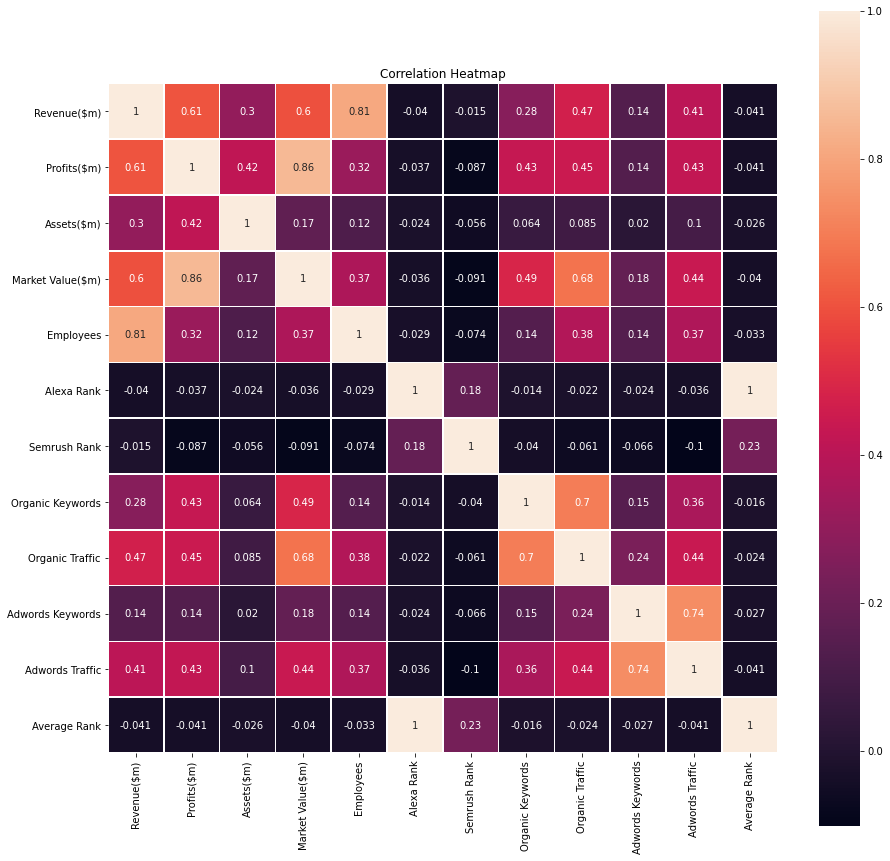

In [18]:
f, ax = plt.subplots(figsize=(15, 15))

plt.title('Correlation Heatmap')

sns.heatmap(df_final.corr(), annot = True, square = True, linewidths=0.7, ax = ax)
plt.show()

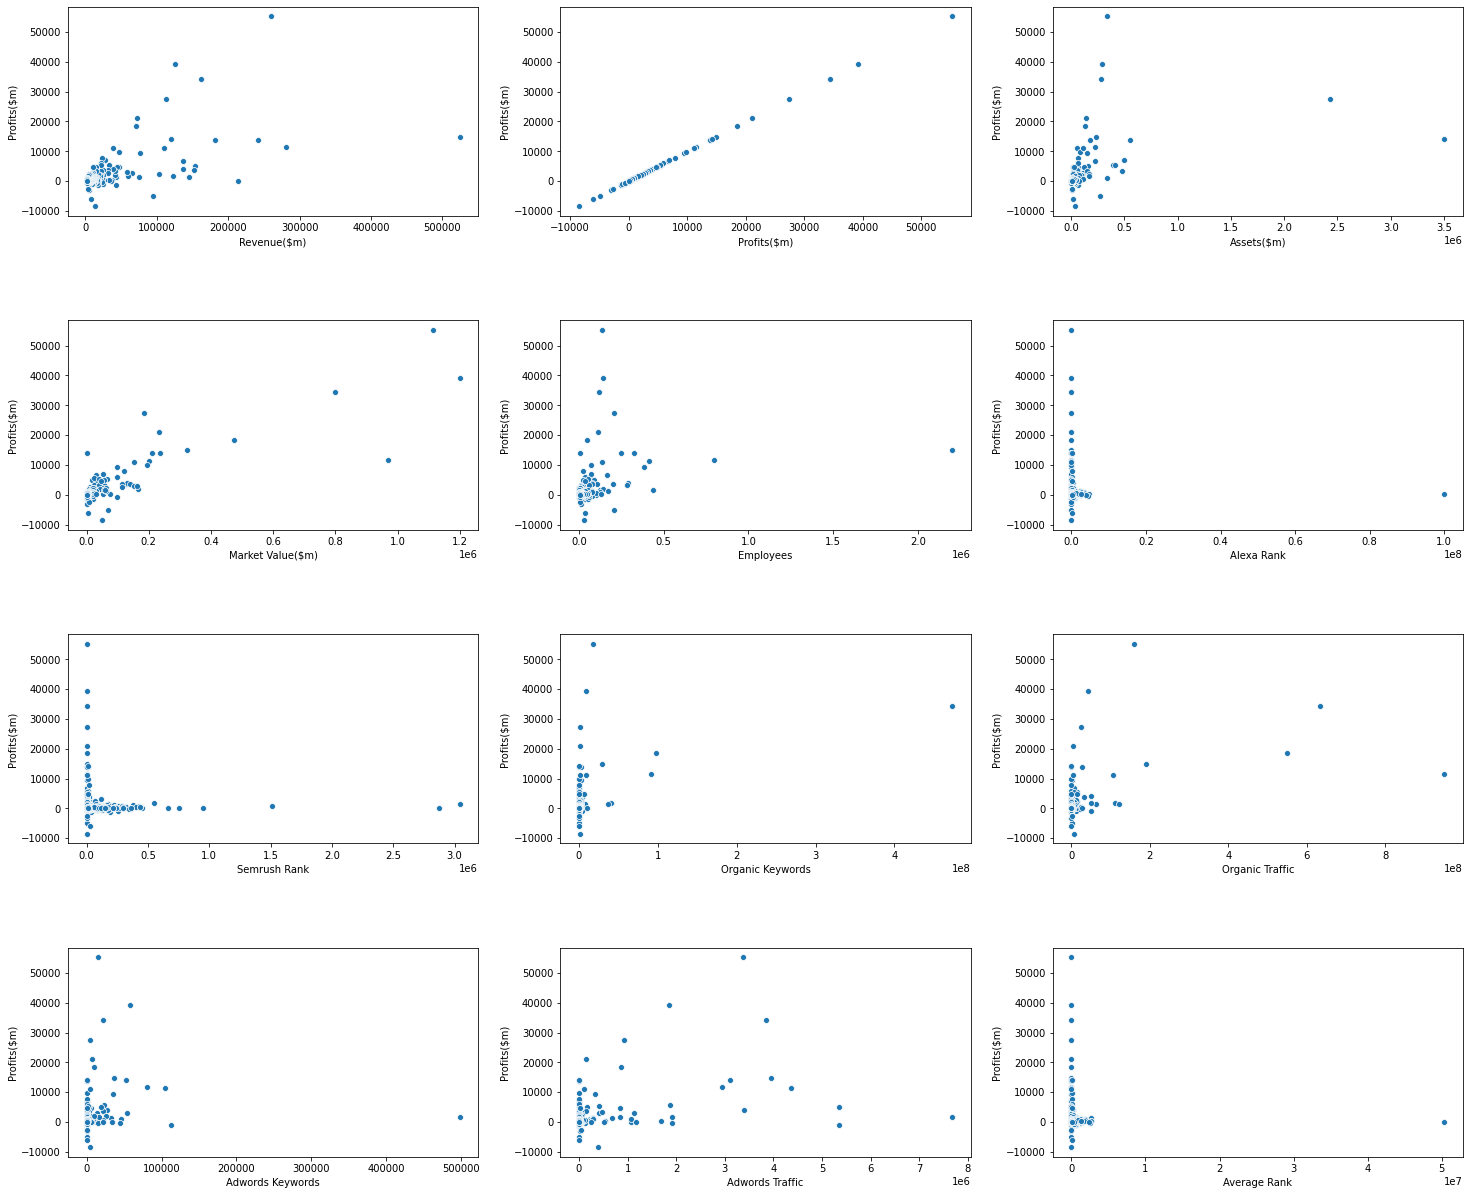

In [19]:
plt.figure(figsize=(25,50))
for i, m in enumerate(df_final[:-1]):
    plt.subplot(9, 3, i+1)
    sns.scatterplot(x = df_final[m], y = df_final["Profits($m)"],)
    plt.subplots_adjust(hspace=0.5)
    
plt.show()

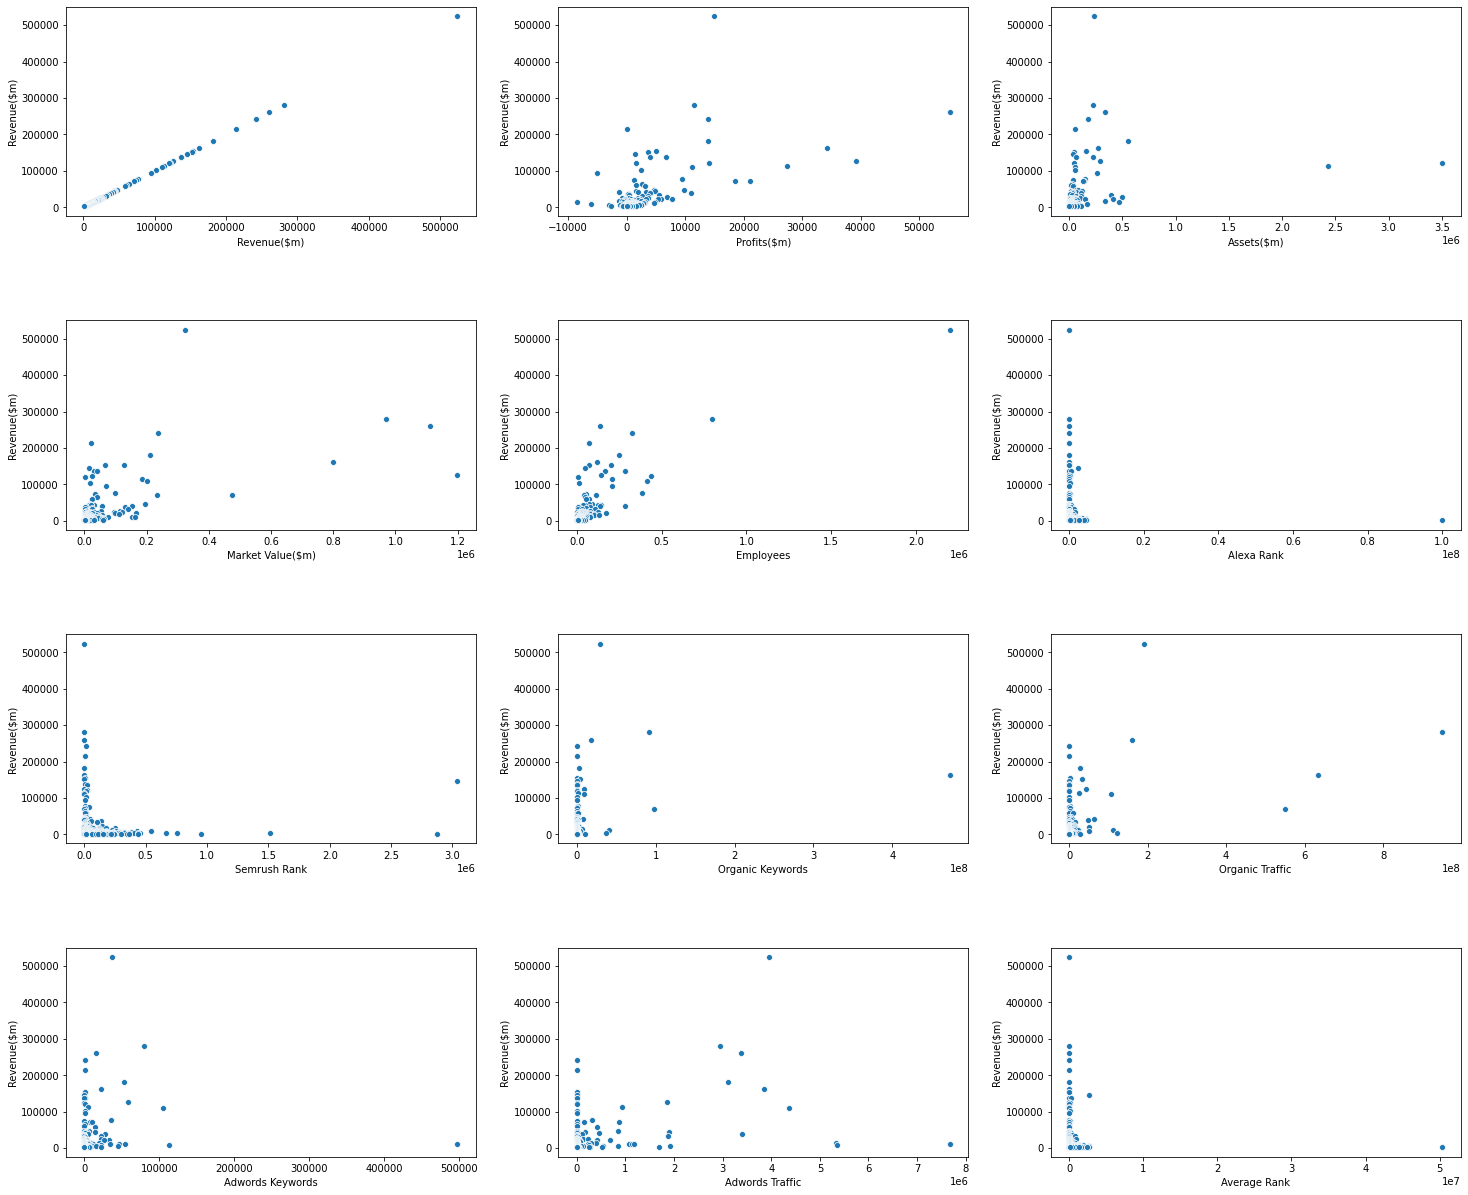

In [20]:
plt.figure(figsize=(25,50))
for i, m in enumerate(df_final[:-1]):
    plt.subplot(9, 3, i+1)
    sns.scatterplot(x = df_final[m], y = df_final["Revenue($m)"],)
    plt.subplots_adjust(hspace=0.5)
    
plt.show()

In [21]:
c = df_final.columns

Scaler = MinMaxScaler(feature_range = (0, 1))

In [22]:
scaled_array = Scaler.fit_transform(df_final)

mul_factor = Scaler.scale_[0]
add_factor = Scaler.min_[0]

df_scaled = pd.DataFrame(scaled_array, columns = c)

df_scaled.head()

,Revenue($m),Profits($m),Assets($m),Market Value($m),Employees,Alexa Rank,Semrush Rank,Organic Keywords,Organic Traffic,Adwords Keywords,Adwords Traffic,Average Rank
0,1.000000,0.366786,0.067265,0.268269,1.000000,1.250000e-06,0.000004,0.061631,0.200243,0.074426,0.514793,1.350984e-06
1,0.533605,0.315141,0.064054,0.809203,0.362712,1.300000e-07,0.000000,0.193244,1.000000,0.160682,0.383626,1.192045e-07
2,0.494621,1.000000,0.096394,0.927549,0.062251,5.000000e-07,0.000006,0.037845,0.167403,0.030321,0.440837,6.556247e-07
3,0.460100,0.350444,0.049390,0.197202,0.147708,2.557900e-04,0.003614,0.000034,0.000141,0.000347,0.000378,3.632558e-04
4,0.406771,0.133936,0.016779,0.018209,0.031796,1.996400e-04,0.002004,0.000566,0.000468,0.000155,0.000031,2.588426e-04


In [23]:
Expl_Model_ = df_scaled[["Organic Traffic", "Adwords Traffic", "Assets($m)", "Revenue($m)", "Profits($m)"]]
Expl_Model_.head()

,Organic Traffic,Adwords Traffic,Assets($m),Revenue($m),Profits($m)
0,0.200243,0.514793,0.067265,1.000000,0.366786
1,1.000000,0.383626,0.064054,0.533605,0.315141
2,0.167403,0.440837,0.096394,0.494621,1.000000
3,0.000141,0.000378,0.049390,0.460100,0.350444
4,0.000468,0.000031,0.016779,0.406771,0.133936


In [24]:
Model_Train, Model_Test = train_test_split(Expl_Model_, test_size=0.4, random_state = 42)

In [25]:
Model_Train.head()

,Organic Traffic,Adwords Traffic,Assets($m),Revenue($m),Profits($m)
104,0.000052,0.000081,0.004444,0.013179,0.139738
230,0.000003,0.000000,0.003666,0.001678,0.136820
159,0.000594,0.015537,0.004334,0.005990,0.126749
31,0.000029,0.000057,0.009191,0.077411,0.165114
117,0.000144,0.000000,0.002066,0.011471,0.151433


In [26]:
Model_Test.head()

,Organic Traffic,Adwords Traffic,Assets($m),Revenue($m),Profits($m)
273,0.000020,0.000000,0.001005,0.000522,0.138126
155,0.000018,0.000000,0.001124,0.006261,0.134847
84,0.000410,0.000006,0.014145,0.018258,0.154920
82,0.000094,0.000151,0.018875,0.019158,0.150659
261,0.000030,0.000000,0.000500,0.000721,0.137196


In [27]:
X_Train = Model_Train.drop(["Revenue($m)", "Profits($m)"], axis = 1)
Y_Train = Model_Train[["Revenue($m)", "Profits($m)"]]

X_Test = Model_Test.drop(["Revenue($m)", "Profits($m)"], axis = 1)
Y_Test = Model_Test[["Revenue($m)", "Profits($m)"]]

In [28]:
ridge = Ridge()
lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1,2,5,10,20]}

### OLS

In [29]:
OLS_Train_Y_Rev = Model_Train[["Revenue($m)"]]
OLS_Train_Y_Prof = Model_Train[["Profits($m)"]]

OLS_Test_Y_Rev = Model_Test[["Revenue($m)"]]
OLS_Test_Y_Prof = Model_Test[["Profits($m)"]]

In [30]:
model_Rev = sm.OLS(OLS_Train_Y_Rev, X_Train).fit()
model_Prof = sm.OLS(OLS_Train_Y_Prof, X_Train).fit()

### Ridge:

In [31]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [32]:
ridge_regressor.fit(X_Train, Y_Train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 1, 2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [33]:
print(ridge_regressor.best_params_)

{'alpha': 1}


In [34]:
ridge_regressor.best_score_

-0.008807364040992586

### Lasso:

In [35]:
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [36]:
lasso_regressor.fit(X_Train, Y_Train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 1, 2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [37]:
print(lasso_regressor.best_params_)

{'alpha': 0.01}


In [38]:
lasso_regressor.best_score_

-0.010261210952334105

### Prediction:

In [39]:
Predict_Y_Ridge = ridge_regressor.predict(X_Test)

In [40]:
Predict_Y_Lasso = lasso_regressor.predict(X_Test)

In [41]:
Predict_Y_RevOLS = model_Rev.predict(X_Test)
Predict_Y_ProfOLS = model_Prof.predict(X_Test)

### $R^2$ Value for different models

In [42]:
print(100*r2_score(Y_Test, Predict_Y_Ridge))

37.839940131494465


In [43]:
print(100*r2_score(Y_Test, Predict_Y_Lasso))

-0.7113569421398624


In [44]:
model_Rev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Revenue($m)   R-squared (uncentered):                   0.410
Model:                            OLS   Adj. R-squared (uncentered):              0.400
Method:                 Least Squares   F-statistic:                              40.36
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                    7.54e-20
Time:                        17:44:53   Log-Likelihood:                          174.50
No. Observations:                 177   AIC:                                     -343.0
Df Residuals:                     174   BIC:                                     -333.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Organic Traffic     0.5405      0.097      5.571      0.000       0.349       0.732
Adwords Traffic     0.3283      0.070      4.693      0.000       0.190       0.466
Assets($m)          0.3584      0.088      4.079      0.000       0.185       0.532
==============================================================================
Omnibus:                      180.877   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4697.171
Skew:                           3.832   Prob(JB):                         0.00
Kurtosis:                      27.045   Cond. No.                         1.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model_Prof.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Profits($m)   R-squared (uncentered):                   0.271
Model:                            OLS   Adj. R-squared (uncentered):              0.258
Method:                 Least Squares   F-statistic:                              21.53
Date:                Sat, 08 Aug 2020   Prob (F-statistic):                    6.60e-12
Time:                        17:44:53   Log-Likelihood:                          75.168
No. Observations:                 177   AIC:                                     -144.3
Df Residuals:                     174   BIC:                                     -134.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Organic Traffic     0.1707      0.170      1.003      0.317      -0.165       0.506
Adwords Traffic     0.6335      0.123      5.167      0.000       0.391       0.875
Assets($m)          0.6593      0.154      4.281      0.000       0.355       0.963
==============================================================================
Omnibus:                       58.972   Durbin-Watson:                   0.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1644.961
Skew:                          -0.428   Prob(JB):                         0.00
Kurtosis:                      17.910   Cond. No.                         1.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X_toPredict = [[0.15, 0.21, 0.25]]
X_toPredict = pd.DataFrame(X_toPredict, columns = X_Test.columns)
X_toPredict

,Organic Traffic,Adwords Traffic,Assets($m)
0,0.15,0.21,0.25


### OLS Prediction

In [47]:
Y_Predicted_OLS_Rev = model_Rev.predict(X_toPredict)
Y_Predicted_OLS_Prof = model_Prof.predict(X_toPredict)

In [48]:
Y_Predicted_OLS_Rev = Y_Predicted_OLS_Rev + abs(add_factor)
Y_Predicted_OLS_Rev = Y_Predicted_OLS_Rev / mul_factor

Y_Predicted_OLS_Rev = pd.DataFrame(Y_Predicted_OLS_Rev, columns = ["OLS_Revenue($m)"])

Y_Predicted_OLS_Prof = Y_Predicted_OLS_Prof + abs(add_factor)
Y_Predicted_OLS_Prof = Y_Predicted_OLS_Prof / mul_factor

Y_Predicted_OLS_Prof = pd.DataFrame(Y_Predicted_OLS_Prof, columns = ["OLS_Profits($m)"])

In [49]:
Y_Predicted_OLS_Rev

,OLS_Revenue($m)
0,127078.794017


In [50]:
Y_Predicted_OLS_Prof

,OLS_Profits($m)
0,170830.113274


### Ridge Prediction

In [51]:
Y_Predicted_Ridge = ridge_regressor.predict(X_toPredict)

In [52]:
Y_Predicted_Ridge = Y_Predicted_Ridge + abs(add_factor)
Y_Predicted_Ridge = Y_Predicted_Ridge / mul_factor

Y_Predicted_Ridge = pd.DataFrame(Y_Predicted_Ridge, columns = ["Ridge_Revenue($m)", "Ridge_Profits($m)"])

In [53]:
Y_Predicted_Ridge

,Ridge_Revenue($m),Ridge_Profits($m)
0,87442.738994,135193.910777


### Lasso Prediction

In [54]:
Y_Predicted_Lasso = lasso_regressor.predict(X_toPredict)

In [55]:
Y_Predicted_Lasso = Y_Predicted_Lasso + abs(add_factor)
Y_Predicted_Lasso = Y_Predicted_Lasso / mul_factor

Y_Predicted_Lasso = pd.DataFrame(Y_Predicted_Lasso, columns = ["Lasso_Revenue($m)", "Lasso_Profits($m)"])

In [56]:
Y_Predicted_Lasso

,Lasso_Revenue($m),Lasso_Profits($m)
0,22740.163277,86261.676584
